Import all liubraries need to use in throughout code


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#Overview of dataset

In [6]:
#Read data from the "day.CSV" file

In [172]:
Bike=pd.read_csv("day.csv")

In [173]:
Bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Check number of rows and columns in dataset using shape function

In [174]:
Bike.shape

(730, 16)

In [175]:
# So we have 730 columns and 16 columns in the dataset
# 

In [176]:
#Check summary of data like using median,max,min
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#Mean and median almost looks identical so we can conclude that there is no outliers in dataset 


In [177]:
#Check structure of dataset like D_type and any null or missing values in dataset
Bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
#Data shows that We have all valyes in dataset 

#Cleansing of dataset


In [178]:
#Remove unique columns from dataset (Here instant and dteday)
Bike=Bike.drop(["instant","dteday"],axis=1)

In [179]:
#Remove dependent variable from dataset 
#cnt=casual+registered  so we can keep only cnt variable for our anaylysis.
Bike=Bike.drop(["casual","registered"],axis=1)

In [180]:
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


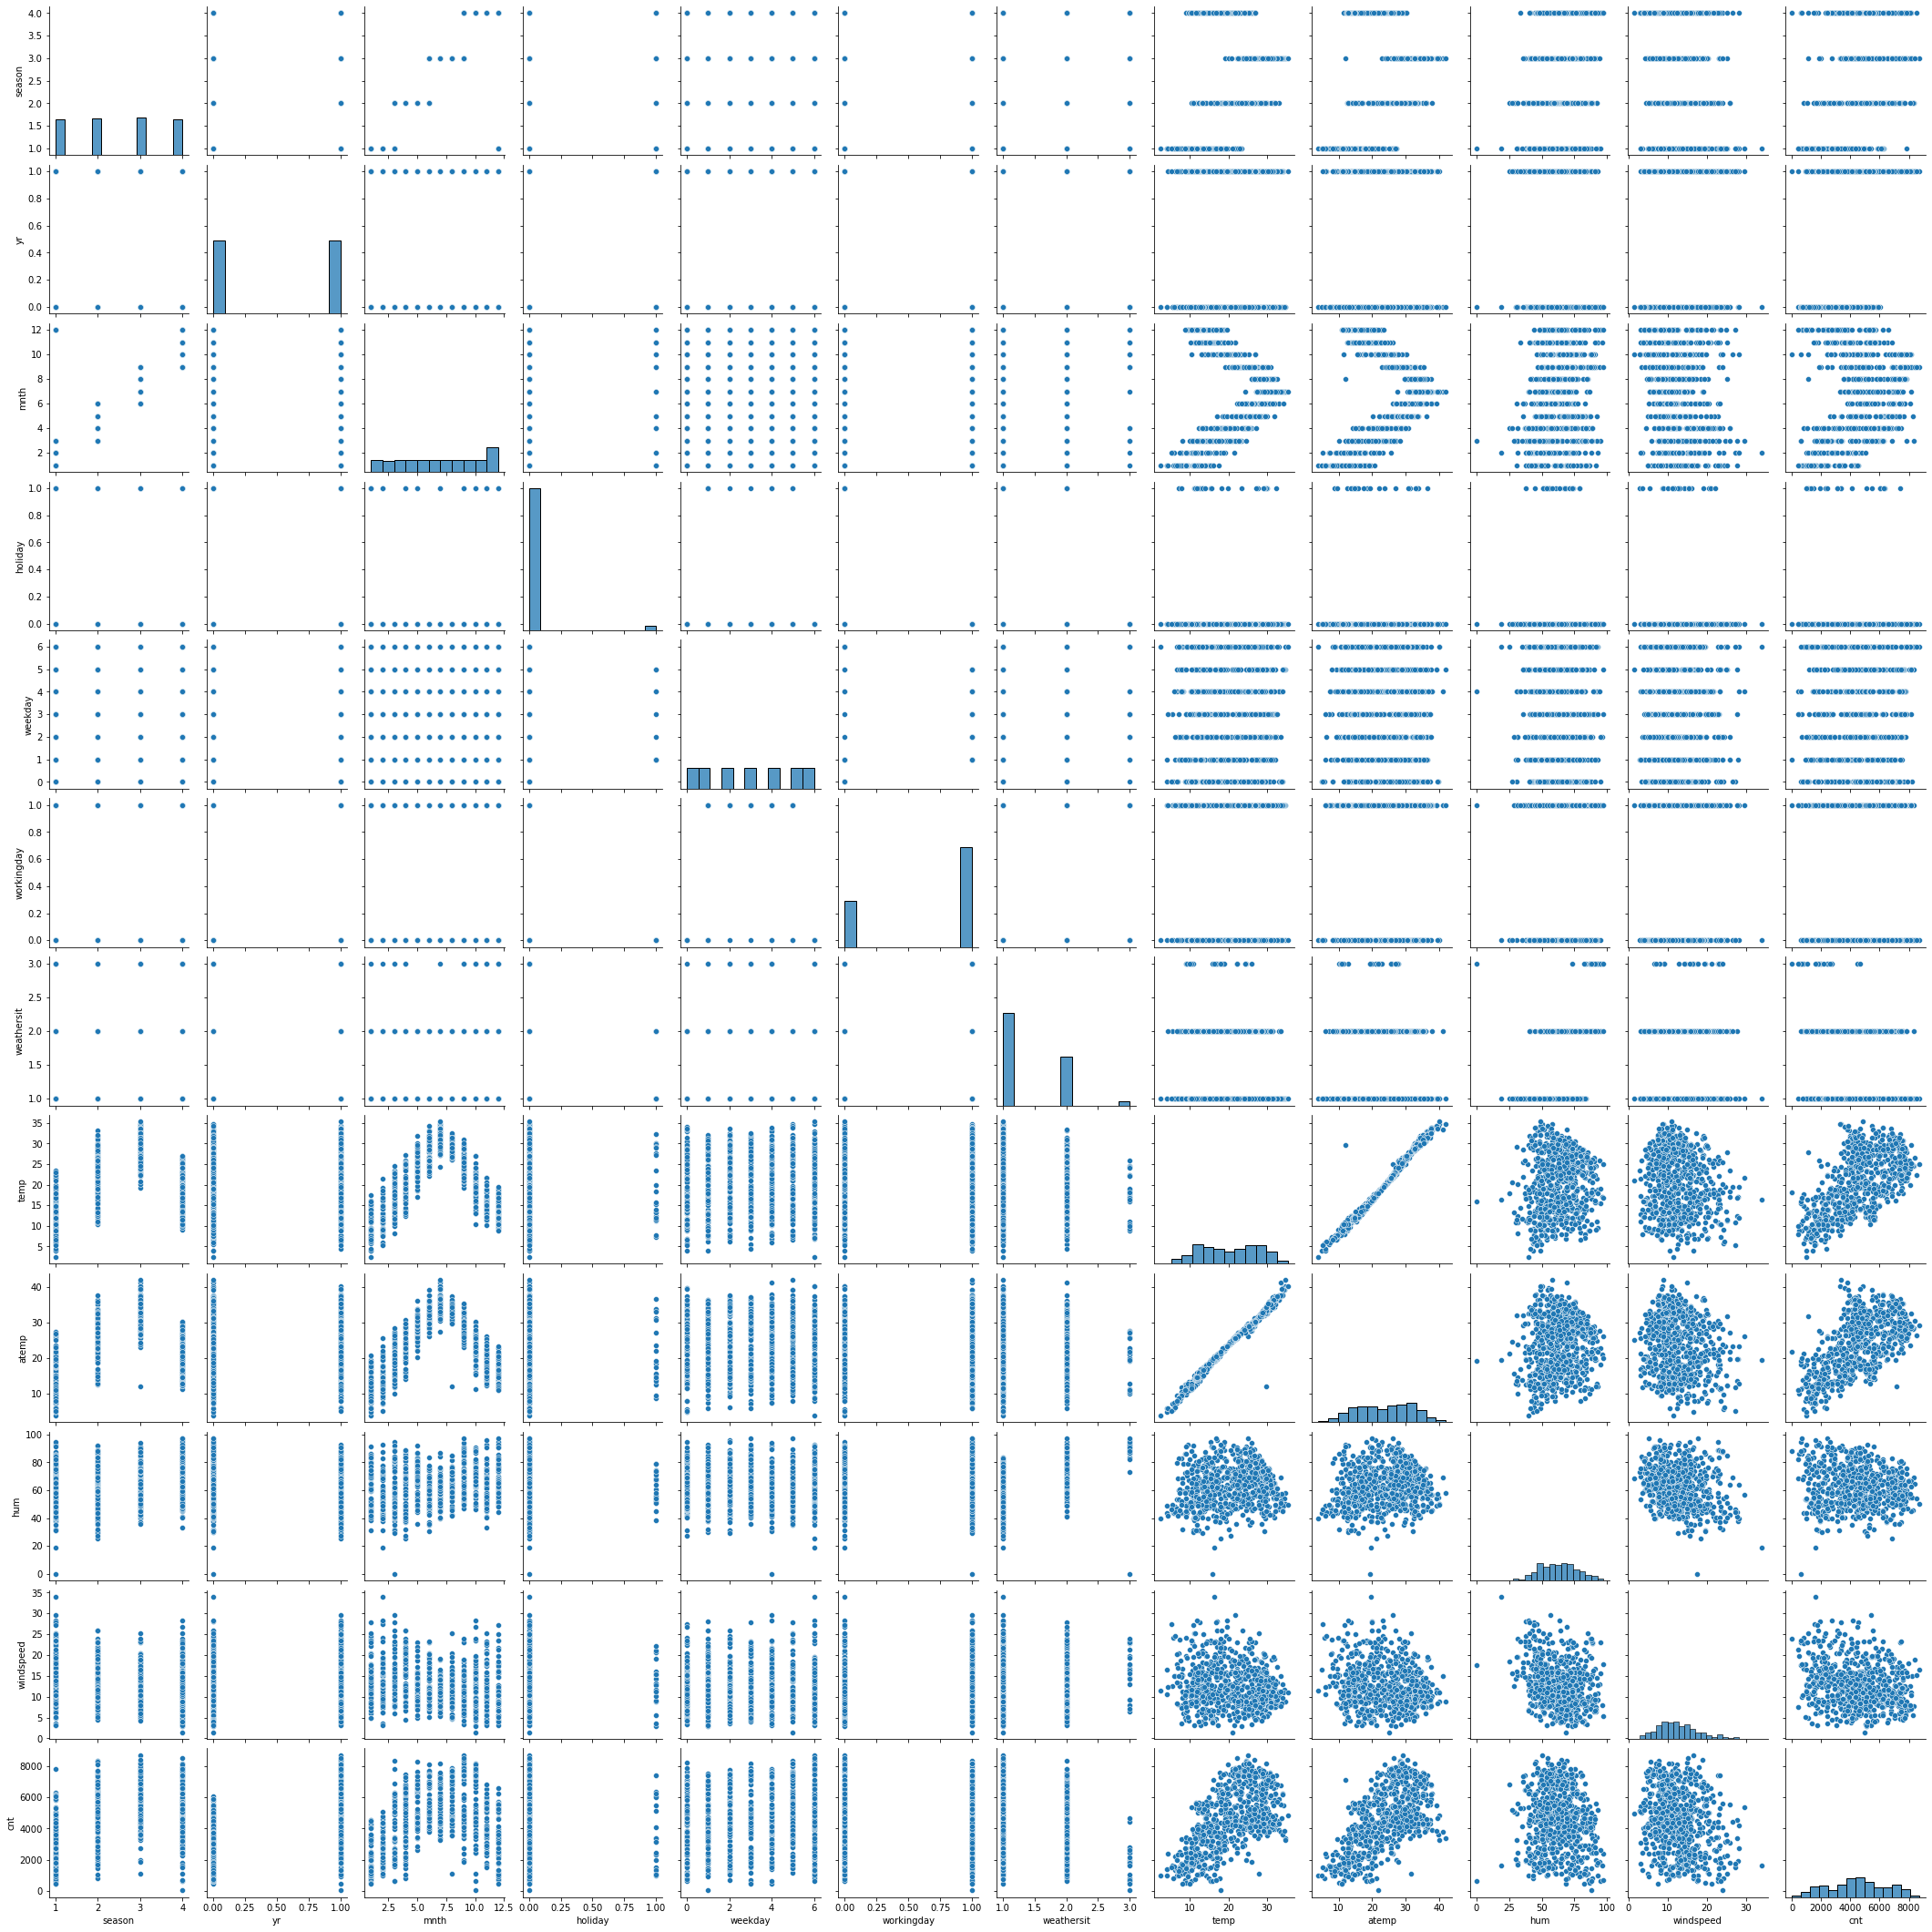

In [181]:
sns.pairplot(Bike)
plt.show()

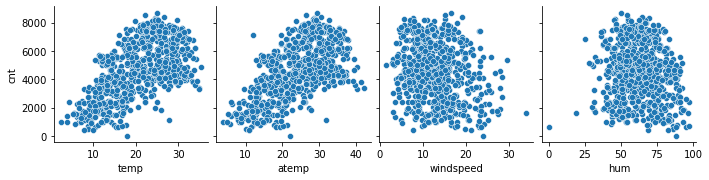

In [182]:
sns.pairplot(data=Bike,
            x_vars=['temp','atemp','windspeed','hum'],
            y_vars='cnt')
plt.show()


In [24]:
#Plot shows cnt variable most likely dependent on temp and a_temp in form linear regression.
#so,we can conclude that we can use Linear regression model to predict cnt variable 


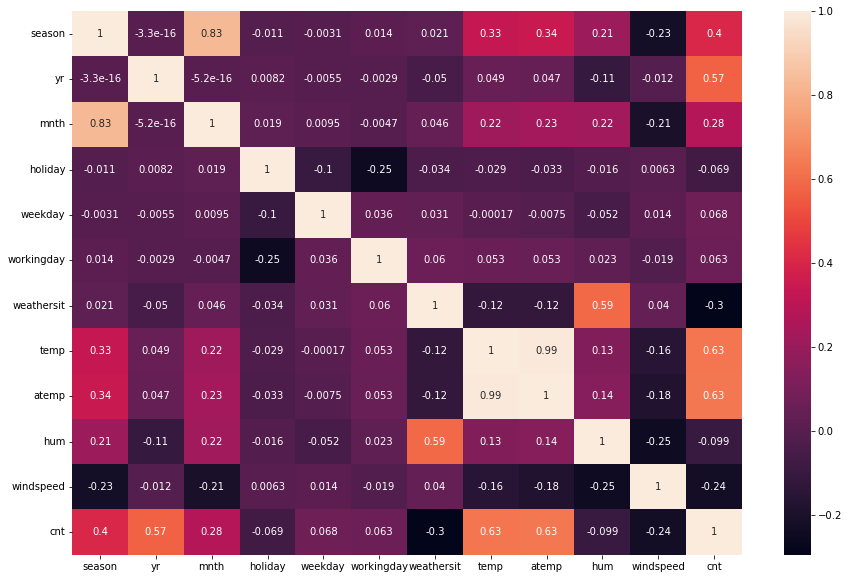

In [131]:
plt.figure(figsize=(15,10))
sns.heatmap(Bike.corr(),annot=True)
plt.show()

#last cloumns of headtmap represnt temp and atemp,yr and season are corelated with cnt variable
#Cnt variable highly corelated with from high to low corelation metrix
   1)temp
   2)atemp
   3)yr
   4)season


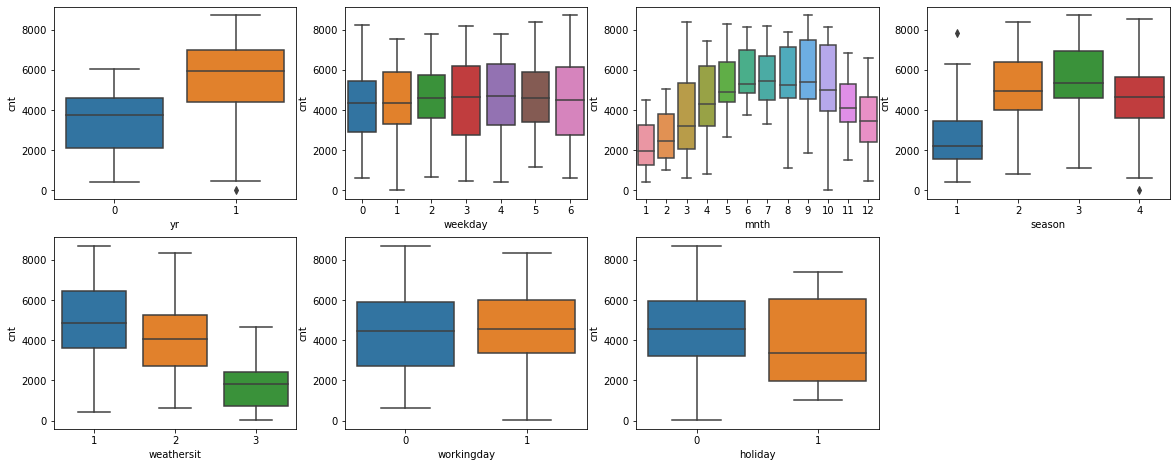

In [183]:
# visualising the categorical variables via box plots
plt.figure(figsize=(20,12))
plt.subplot(3,4,1)
sns.boxplot(x='yr',y='cnt',data=Bike)
plt.subplot(3,4,3)
sns.boxplot(x='mnth',y='cnt',data=Bike)
plt.subplot(3,4,4)
sns.boxplot(x='season',y='cnt',data=Bike)
plt.subplot(3,4,2)
sns.boxplot(x='weekday',y='cnt',data=Bike)
plt.subplot(3,4,6)
sns.boxplot(x='workingday',y='cnt',data=Bike)
plt.subplot(3,4,7)
sns.boxplot(x='holiday',y='cnt',data=Bike)
plt.subplot(3,4,5)
sns.boxplot(x='weathersit',y='cnt',data=Bike)
plt.show()

In [184]:
#Change the numeric value into more readable format 
Bike.loc[Bike['season']==1,'season']="spring"
Bike.loc[Bike['season']==2,'season']="summer"
Bike.loc[Bike['season']==3,'season']="fall"
Bike.loc[Bike['season']==4,'season']="winter"

Bike.loc[Bike['weathersit']==1,'weathersit'] = 'clear'
Bike.loc[Bike['weathersit']==2,'weathersit'] = 'mist'
Bike.loc[Bike['weathersit']==3,'weathersit'] = 'light snow'
Bike.loc[Bike['weathersit']==4,'weathersit'] = 'heavy rain'


In [185]:
Bike.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [186]:
Bike.weathersit.unique()

array(['mist', 'clear', 'light snow'], dtype=object)

In [136]:
Bike.head()
Bike.shape

(730, 12)

In [82]:
#Check for yr and mnth
Bike.yr.unique()


array([0, 1], dtype=int64)

In [84]:
Bike.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [187]:
#change month from numeric to text format
def mnth_int_str(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

Bike[['mnth']] = Bike[['mnth']].apply(mnth_int_str)


In [94]:
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [188]:
#Now we need to create dummy variable //n values we need only n-1 varaible to 
dummy_season = pd.get_dummies(Bike['season'], drop_first=True)
dummy_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [96]:
Dummy_weathersit = pd.get_dummies(Bike['weathersit'], drop_first=True)
Dummy_weathersit.head()

,light snow,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [189]:
dummy_mnth = pd.get_dummies(Bike['mnth'], drop_first=True)
dummy_mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [190]:
Bike = pd.concat([Bike,dummy_mnth,dummy_season,Dummy_weathersit],axis=1)
Bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,light snow,mist
0,spring,0,Jan,0,6,0,mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,1
1,spring,0,Jan,0,0,0,mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,1
2,spring,0,Jan,0,1,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
3,spring,0,Jan,0,2,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,3,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [191]:
#Drop all columns that we have created dummy variable
Bike=Bike.drop(['season','mnth','weathersit'],axis=1)
Bike.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Aug,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,light snow,mist
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,1,0,0,0,0


In [192]:
#import all libraries that are required for model building and evaluation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm


In [193]:
#Split data into two part training dataset and testing dataset
Bike_train, Bike_test = train_test_split(Bike,train_size=0.7,random_state=100)
print("Training and testing shape",Bike_train.shape,Bike_test.shape)
Bike_train.head()


Training and testing shape (510, 25) (220, 25)


,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Aug,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,light snow,mist
576,1,0,2,1,29.246653,33.1448,70.4167,11.083475,7216,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,6,0,16.980847,20.6746,62.1250,10.792293,4066,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,...,0,0,0,0,0,1,0,0,0,0
482,1,0,6,0,15.443347,18.8752,48.9583,8.708325,4220,0,...,0,0,0,0,0,0,1,0,0,1
111,0,0,5,1,13.803347,16.0977,72.9583,14.707907,1683,0,...,0,0,0,0,0,0,1,0,0,1


In [194]:
#Create scaler object for rescaling data We are using MinMAxScaler
scaler = MinMaxScaler()
scaler_var_list = ['temp', 'atemp','hum', 'windspeed', 'cnt']
# Fitting the list of numeric variables on the data
Bike_train[scaler_var_list] = scaler.fit_transform(Bike_train[scaler_var_list])
Bike_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Aug,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,light snow,mist
576,1,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,...,0,0,0,0,0,1,0,0,0,0
482,1,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,0,0,0,0,0,0,1,0,0,1
111,0,0,5,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,...,0,0,0,0,0,0,1,0,0,1


In [195]:
# Now everything is in numeric and check data once again 
Bike_train.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Aug,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,light snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,2.990196,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,...,0.098039,0.084314,0.086275,0.084314,0.080392,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,0.157763,2.017093,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,...,0.297660,0.278131,0.281045,0.278131,0.272166,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


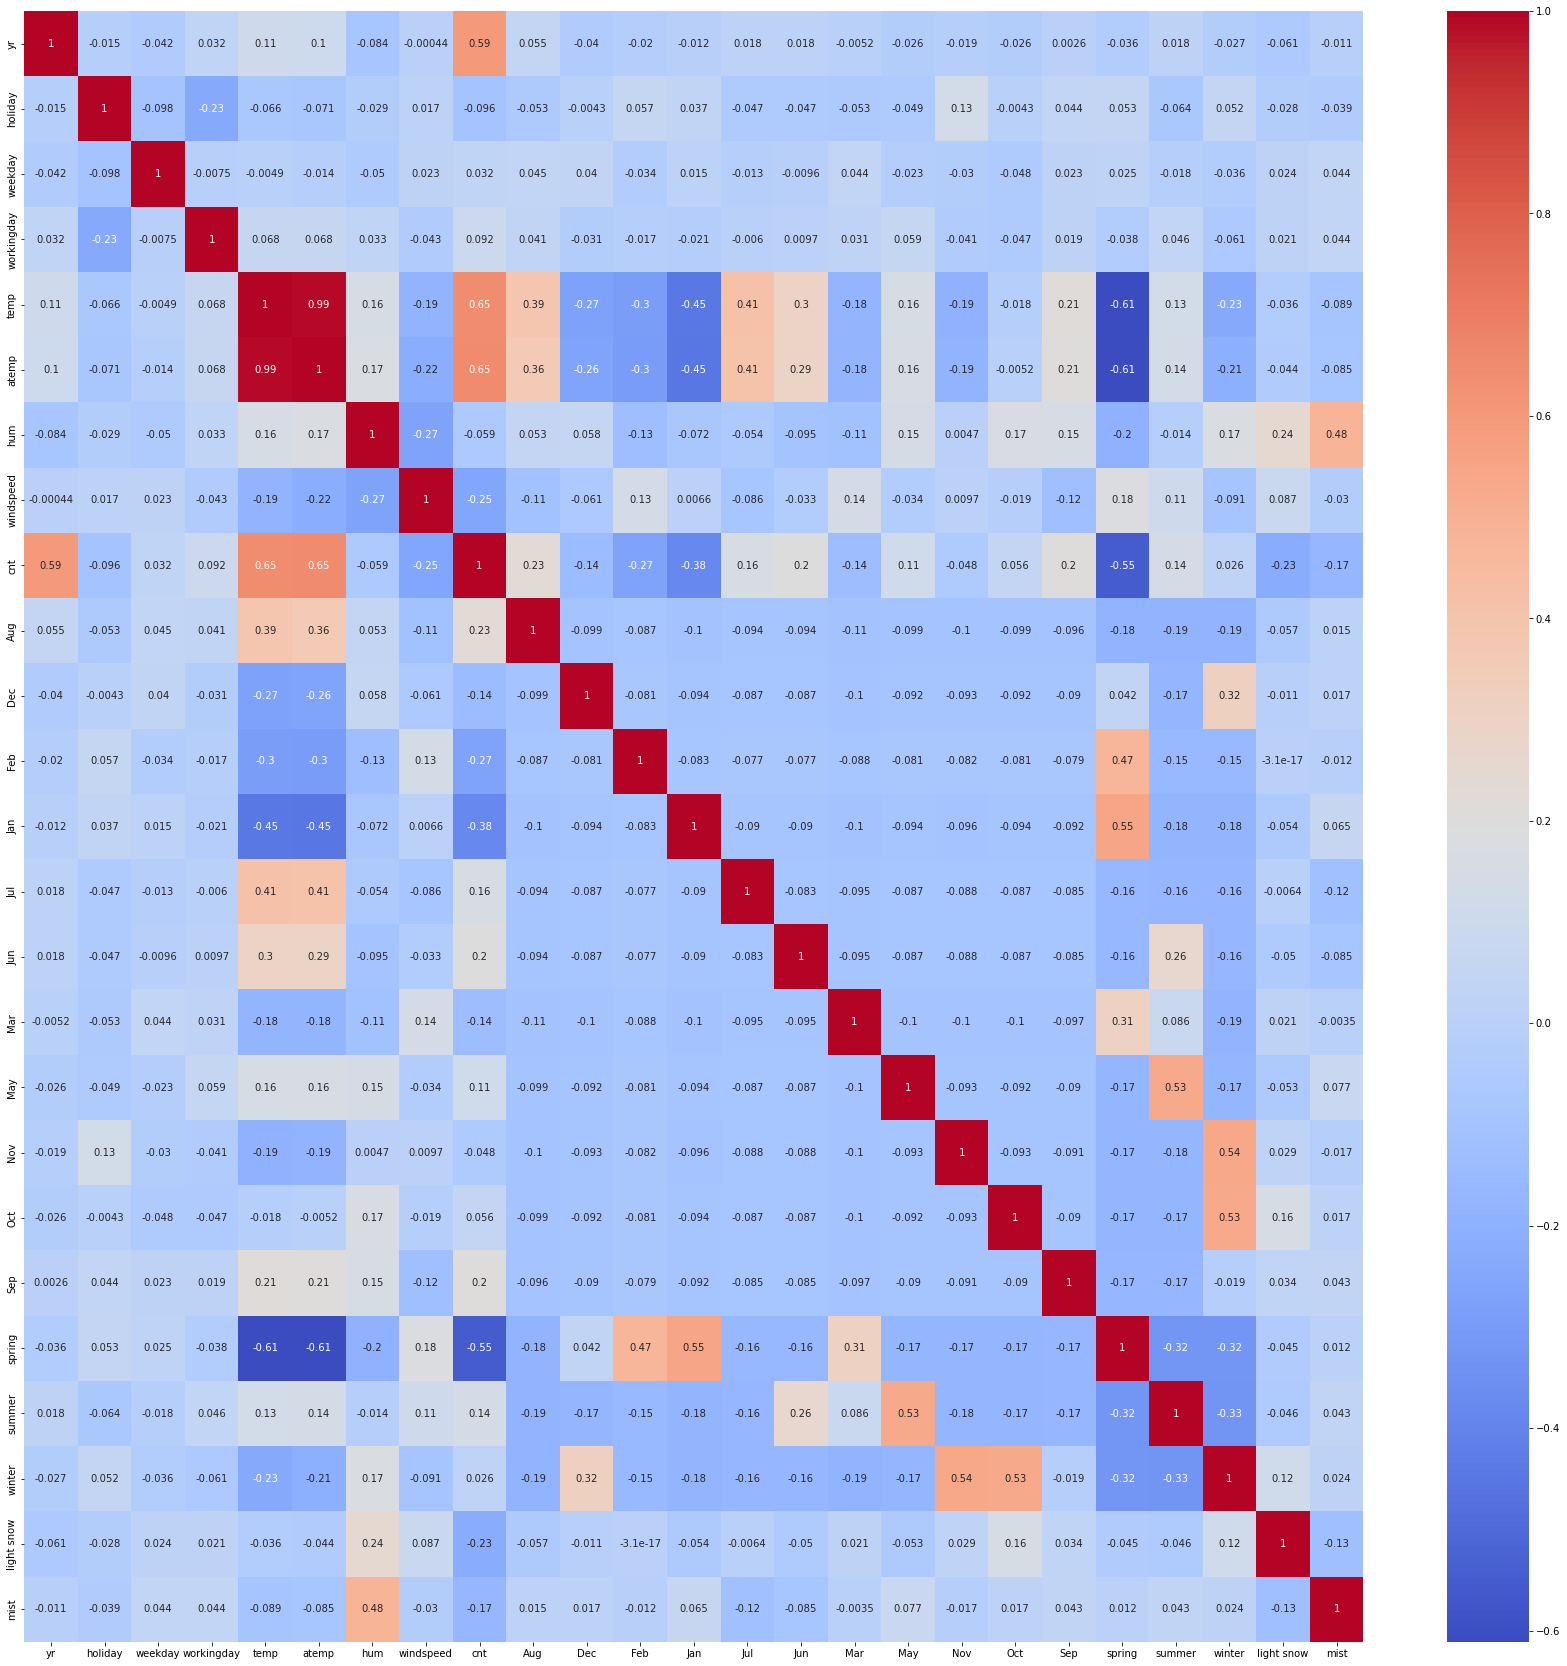

In [196]:
fig,ax = plt.subplots(figsize=(30,30))
cor = Bike_train.corr()
ax = sns.heatmap(cor, annot = True, cmap = "coolwarm")
plt.show()

In [202]:
# let's make our target variable and independent variable for ML
y_train=Bike_train.pop('cnt') #Only one target variable
X_train=Bike_train

In [203]:
print(X_train.shape,"\n")
X_train.head()

(510, 24) 



,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,Aug,Dec,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,light snow,mist
576,1,0,2,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,6,0,0.442393,0.438975,0.640189,0.255342,0,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0,0.245101,0.200348,0.498067,0.663106,0,1,...,0,0,0,0,0,1,0,0,0,0
482,1,0,6,0,0.395666,0.391735,0.504508,0.188475,0,0,...,0,0,0,0,0,0,1,0,0,1
111,0,0,5,1,0.345824,0.318819,0.751824,0.380981,0,0,...,0,0,0,0,0,0,1,0,0,1


In [204]:
X_train_sm = sm.add_constant(X_train['temp'])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           2.46e-61
Time:                        20:23:42   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
#Model shows that p value is almost 0 and R squared is 0.416 that means we are predicting 41.6%  prob(f_statics) is also low
#So model looks significant let's add one more variable to increase r squared


In [205]:
X_train_sm = sm.add_constant(X_train[['temp','atemp']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           8.38e-61
Time:                        20:23:49   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
atemp          0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
#nNoted that p value of temp has also increased
# Let's add all variable to see effect of p_value


In [206]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          4.27e-184
Time:                        20:23:54   Log-Likelihood:                 526.44
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2871      0.044      6.505      0.000       0.200       0.374
yr             0.2328      0.008     28.937      0.000       0.217       0.249
holiday       -0.0655      0.026     -2.494      0.013      -0.117      -0.014
weekday        0.0078      0.002      3.912      0.000       0.004       0.012
workingday     0.0172      0.009      1.978      0.048       0.000       0.034
temp           0.3816      0.141      2.703      0.007       0.104       0.659
atemp          0.0644      0.137      0.469      0.639      -0.205       0.334
hum           -0.1511      0.038     -3.925      0.000      -0.227      -0.075
windspeed     -0.1830      0.026     -6.966      0.000      -0.235      -0.131
Aug            0.0235      0.034      0.695      0.487      -0.043       0.090
Dec           -0.0452      0.034     -1.348      0.178      -0.111       0.021
Feb           -0.0327      0.033     -0.995      0.320      -0.097       0.032
Jan           -0.0631      0.034     -1.884      0.060      -0.129       0.003
Jul           -0.0317      0.035     -0.908      0.364      -0.100       0.037
Jun            0.0070      0.025      0.283      0.777      -0.042       0.056
Mar            0.0014      0.024      0.058      0.954      -0.047       0.050
May            0.0255      0.021      1.209      0.227      -0.016       0.067
Nov           -0.0410      0.036     -1.132      0.258      -0.112       0.030
Oct            0.0071      0.036      0.199      0.843      -0.063       0.077
Sep            0.0874      0.032      2.740      0.006       0.025       0.150
spring        -0.0447      0.030     -1.494      0.136      -0.103       0.014
summer         0.0433      0.026      1.659      0.098      -0.008       0.095
winter         0.1085      0.028      3.895      0.000       0.054       0.163
light snow    -0.2535      0.026     -9.650      0.000      -0.305      -0.202
mist          -0.0594      0.010     -5.719      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       84.303   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.919
Skew:                          -0.803   Prob(JB):                     1.60e-51
Kurtosis:                       5.903   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
# Now we have all p_values let's find VIF for all variable
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,434.11
5,atemp,379.52
6,hum,37.34
19,spring,11.73
21,winter,11.62
20,summer,6.86
17,Oct,6.28
16,Nov,6.10
8,Aug,5.91
7,windspeed,5.31


In [209]:
# Droping of priority as below
#  VIF    P_VAL   Priority
#   High  High    1
#   High   Low    3
#   Low    High   2
#   Low    Low    4


X_train_1= X_train.drop('Mar', axis=1)

In [211]:
X_train_sm = sm.add_constant(X_train_1)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.8
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.83e-185
Time:                        20:26:34   Log-Likelihood:                 526.44
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2880      0.041      6.961      0.000       0.207       0.369
yr             0.2328      0.008     28.967      0.000       0.217       0.249
holiday       -0.0656      0.026     -2.497      0.013      -0.117      -0.014
weekday        0.0078      0.002      3.921      0.000       0.004       0.012
workingday     0.0172      0.009      1.983      0.048       0.000       0.034
temp           0.3813      0.141      2.706      0.007       0.104       0.658
atemp          0.0643      0.137      0.469      0.640      -0.205       0.334
hum           -0.1509      0.038     -3.938      0.000      -0.226      -0.076
windspeed     -0.1831      0.026     -6.986      0.000      -0.235      -0.132
Aug            0.0228      0.032      0.718      0.473      -0.040       0.085
Dec           -0.0464      0.026     -1.791      0.074      -0.097       0.004
Feb           -0.0341      0.022     -1.534      0.126      -0.078       0.010
Jan           -0.0646      0.022     -2.896      0.004      -0.108      -0.021
Jul           -0.0323      0.033     -0.973      0.331      -0.098       0.033
Jun            0.0066      0.024      0.280      0.780      -0.040       0.053
May            0.0251      0.020      1.272      0.204      -0.014       0.064
Nov           -0.0421      0.031     -1.375      0.170      -0.102       0.018
Oct            0.0060      0.031      0.198      0.844      -0.054       0.066
Sep            0.0866      0.029      2.996      0.003       0.030       0.143
spring        -0.0441      0.028     -1.559      0.120      -0.100       0.011
summer         0.0430      0.026      1.681      0.093      -0.007       0.093
winter         0.1088      0.027      3.978      0.000       0.055       0.163
light snow    -0.2535      0.026     -9.660      0.000      -0.305      -0.202
mist          -0.0594      0.010     -5.727      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       84.268   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.110
Skew:                          -0.803   Prob(JB):                     1.46e-51
Kurtosis:                       5.905   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
# Now we have all p_values let's find VIF for all variable
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range (X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,434.02
5,atemp,379.39
6,hum,35.27
20,winter,10.51
18,spring,8.26
19,summer,6.86
8,Aug,5.61
7,windspeed,5.29
12,Jul,4.99
16,Oct,4.97


In [213]:
# Now remove the second feature from x_train and re_calculate model
X_train_2 = X_train_1.drop('Oct',axis=1) 

In [214]:
X_train_sm = sm.add_constant(X_train_2)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.41e-186
Time:                        20:29:32   Log-Likelihood:                 526.42
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     487   BIC:                            -909.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2896      0.041      7.139      0.000       0.210       0.369
yr             0.2327      0.008     29.018      0.000       0.217       0.248
holiday       -0.0652      0.026     -2.492      0.013      -0.117      -0.014
weekday        0.0078      0.002      3.924      0.000       0.004       0.012
workingday     0.0171      0.009      1.979      0.048       0.000       0.034
temp           0.3819      0.141      2.712      0.007       0.105       0.658
atemp          0.0643      0.137      0.469      0.639      -0.205       0.333
hum           -0.1502      0.038     -3.940      0.000      -0.225      -0.075
windspeed     -0.1829      0.026     -6.990      0.000      -0.234      -0.131
Aug            0.0204      0.029      0.696      0.487      -0.037       0.078
Dec           -0.0500      0.018     -2.723      0.007      -0.086      -0.014
Feb           -0.0351      0.022     -1.622      0.105      -0.078       0.007
Jan           -0.0655      0.022     -3.011      0.003      -0.108      -0.023
Jul           -0.0348      0.031     -1.127      0.260      -0.095       0.026
Jun            0.0055      0.023      0.239      0.811      -0.039       0.050
May            0.0246      0.020      1.259      0.209      -0.014       0.063
Nov           -0.0469      0.019     -2.481      0.013      -0.084      -0.010
Sep            0.0837      0.025      3.387      0.001       0.035       0.132
spring        -0.0453      0.028     -1.635      0.103      -0.100       0.009
summer         0.0411      0.024      1.738      0.083      -0.005       0.088
winter         0.1114      0.024      4.608      0.000       0.064       0.159
light snow    -0.2534      0.026     -9.668      0.000      -0.305      -0.202
mist          -0.0595      0.010     -5.739      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.580   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.670
Skew:                          -0.799   Prob(JB):                     8.14e-51
Kurtosis:                       5.882   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
# Now we have all p_values let's find VIF for all variable
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range (X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,433.15
5,atemp,379.39
6,hum,33.94
17,spring,8.15
19,winter,6.90
18,summer,6.08
7,windspeed,5.23
8,Aug,4.95
12,Jul,4.44
3,workingday,3.23


In [217]:

#Repeat the process
X_train_3 = X_train_2.drop('Jun', axis=1)
X_train_sm = sm.add_constant(X_train_3)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.00e-187
Time:                        20:31:38   Log-Likelihood:                 526.39
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -915.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2901      0.040      7.171      0.000       0.211       0.370
yr             0.2325      0.008     29.145      0.000       0.217       0.248
holiday       -0.0658      0.026     -2.525      0.012      -0.117      -0.015
weekday        0.0078      0.002      3.924      0.000       0.004       0.012
workingday     0.0170      0.009      1.971      0.049    5.74e-05       0.034
temp           0.3919      0.134      2.917      0.004       0.128       0.656
atemp          0.0599      0.136      0.441      0.659      -0.207       0.326
hum           -0.1514      0.038     -4.010      0.000      -0.226      -0.077
windspeed     -0.1837      0.026     -7.091      0.000      -0.235      -0.133
Aug            0.0163      0.024      0.688      0.492      -0.030       0.063
Dec           -0.0494      0.018     -2.719      0.007      -0.085      -0.014
Feb           -0.0343      0.021     -1.606      0.109      -0.076       0.008
Jan           -0.0644      0.021     -3.035      0.003      -0.106      -0.023
Jul           -0.0392      0.025     -1.597      0.111      -0.087       0.009
May            0.0224      0.017      1.299      0.195      -0.012       0.056
Nov           -0.0465      0.019     -2.472      0.014      -0.084      -0.010
Sep            0.0807      0.021      3.772      0.000       0.039       0.123
spring        -0.0470      0.027     -1.765      0.078      -0.099       0.005
summer         0.0402      0.023      1.724      0.085      -0.006       0.086
winter         0.1094      0.023      4.811      0.000       0.065       0.154
light snow    -0.2534      0.026     -9.676      0.000      -0.305      -0.202
mist          -0.0593      0.010     -5.740      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.083   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.292
Skew:                          -0.797   Prob(JB):                     4.41e-50
Kurtosis:                       5.856   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
# Now we have all p_values let's find VIF for all variable
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range (X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,392.14
5,atemp,372.59
6,hum,33.46
16,spring,7.48
18,winter,6.01
17,summer,5.93
7,windspeed,5.15
3,workingday,3.23
2,weekday,3.22
8,Aug,3.16


In [219]:
#Repeat the process
X_train_4 = X_train_3.drop('atemp', axis=1)
X_train_sm = sm.add_constant(X_train_4)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.74e-188
Time:                        20:34:41   Log-Likelihood:                 526.28
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -921.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2901      0.040      7.177      0.000       0.211       0.370
yr             0.2325      0.008     29.166      0.000       0.217       0.248
holiday       -0.0663      0.026     -2.551      0.011      -0.117      -0.015
weekday        0.0077      0.002      3.911      0.000       0.004       0.012
workingday     0.0170      0.009      1.971      0.049    5.52e-05       0.034
temp           0.4487      0.038     11.716      0.000       0.373       0.524
hum           -0.1505      0.038     -3.996      0.000      -0.225      -0.077
windspeed     -0.1860      0.025     -7.326      0.000      -0.236      -0.136
Aug            0.0155      0.024      0.657      0.512      -0.031       0.062
Dec           -0.0493      0.018     -2.717      0.007      -0.085      -0.014
Feb           -0.0344      0.021     -1.611      0.108      -0.076       0.008
Jan           -0.0646      0.021     -3.050      0.002      -0.106      -0.023
Jul           -0.0392      0.025     -1.599      0.111      -0.087       0.009
May            0.0222      0.017      1.284      0.200      -0.012       0.056
Nov           -0.0465      0.019     -2.471      0.014      -0.083      -0.010
Sep            0.0808      0.021      3.777      0.000       0.039       0.123
spring        -0.0462      0.027     -1.739      0.083      -0.098       0.006
summer         0.0411      0.023      1.773      0.077      -0.004       0.087
winter         0.1104      0.023      4.884      0.000       0.066       0.155
light snow    -0.2542      0.026     -9.741      0.000      -0.305      -0.203
mist          -0.0594      0.010     -5.754      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.315   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.800
Skew:                          -0.790   Prob(JB):                     1.53e-49
Kurtosis:                       5.843   Cond. No.                         60.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
# Now we have all p_values let's find VIF for all variable
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range (X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,hum,33.36
4,temp,22.23
15,spring,7.42
17,winter,5.92
16,summer,5.85
6,windspeed,4.93
3,workingday,3.23
2,weekday,3.21
7,Aug,3.14
11,Jul,2.78


In [221]:
X_train_5 = X_train_4.drop('Aug',axis=1)
X_train_sm = sm.add_constant(X_train_5)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.4
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.75e-189
Time:                        20:36:58   Log-Likelihood:                 526.06
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2987      0.038      7.811      0.000       0.224       0.374
yr             0.2326      0.008     29.216      0.000       0.217       0.248
holiday       -0.0667      0.026     -2.569      0.011      -0.118      -0.016
weekday        0.0078      0.002      3.945      0.000       0.004       0.012
workingday     0.0169      0.009      1.962      0.050   -2.46e-05       0.034
temp           0.4505      0.038     11.801      0.000       0.375       0.526
hum           -0.1494      0.038     -3.973      0.000      -0.223      -0.076
windspeed     -0.1861      0.025     -7.337      0.000      -0.236      -0.136
Dec           -0.0501      0.018     -2.767      0.006      -0.086      -0.015
Feb           -0.0344      0.021     -1.611      0.108      -0.076       0.008
Jan           -0.0646      0.021     -3.051      0.002      -0.106      -0.023
Jul           -0.0502      0.018     -2.803      0.005      -0.085      -0.015
May            0.0218      0.017      1.265      0.206      -0.012       0.056
Nov           -0.0475      0.019     -2.534      0.012      -0.084      -0.011
Sep            0.0719      0.017      4.331      0.000       0.039       0.105
spring        -0.0561      0.022     -2.566      0.011      -0.099      -0.013
summer         0.0307      0.017      1.819      0.070      -0.002       0.064
winter         0.1013      0.018      5.692      0.000       0.066       0.136
light snow    -0.2550      0.026     -9.792      0.000      -0.306      -0.204
mist          -0.0592      0.010     -5.738      0.000      -0.079      -0.039
==============================================================================
Omnibus:                       83.547   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.046
Skew:                          -0.802   Prob(JB):                     3.02e-50
Kurtosis:                       5.856   Cond. No.                         54.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
# Now we have all p_values let's find VIF for all variable
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range (X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,hum,31.70
4,temp,19.85
14,spring,5.61
6,windspeed,4.86
16,winter,4.10
15,summer,3.41
3,workingday,3.22
2,weekday,3.17
9,Jan,2.40
18,mist,2.34


In [224]:
X_train_6 = X_train_5.drop('May',axis=1)
X_train_sm = sm.add_constant(X_train_6)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.4
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          4.80e-190
Time:                        20:40:49   Log-Likelihood:                 525.23
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -932.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2887      0.037      7.711      0.000       0.215       0.362
yr             0.2321      0.008     29.173      0.000       0.216       0.248
holiday       -0.0673      0.026     -2.589      0.010      -0.118      -0.016
weekday        0.0078      0.002      3.936      0.000       0.004       0.012
workingday     0.0173      0.009      2.000      0.046       0.000       0.034
temp           0.4590      0.038     12.207      0.000       0.385       0.533
hum           -0.1435      0.037     -3.843      0.000      -0.217      -0.070
windspeed     -0.1878      0.025     -7.405      0.000      -0.238      -0.138
Dec           -0.0488      0.018     -2.699      0.007      -0.084      -0.013
Feb           -0.0331      0.021     -1.549      0.122      -0.075       0.009
Jan           -0.0630      0.021     -2.980      0.003      -0.105      -0.021
Jul           -0.0507      0.018     -2.825      0.005      -0.086      -0.015
Nov           -0.0459      0.019     -2.454      0.014      -0.083      -0.009
Sep            0.0719      0.017      4.328      0.000       0.039       0.105
spring        -0.0524      0.022     -2.419      0.016      -0.095      -0.010
summer         0.0400      0.015      2.637      0.009       0.010       0.070
winter         0.1032      0.018      5.821      0.000       0.068       0.138
light snow    -0.2568      0.026     -9.868      0.000      -0.308      -0.206
mist          -0.0594      0.010     -5.752      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       81.792   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.546
Skew:                          -0.802   Prob(JB):                     7.02e-47
Kurtosis:                       5.726   Cond. No.                         53.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
# Now we have all p_values let's find VIF for all variable
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range (X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,hum,31.67
4,temp,19.77
13,spring,5.61
6,windspeed,4.77
15,winter,4.10
3,workingday,3.22
2,weekday,3.17
14,summer,2.88
9,Jan,2.40
17,mist,2.34


In [226]:
X_train_7 = X_train_6.drop('Feb',axis=1)
X_train_sm = sm.add_constant(X_train_7)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.21e-190
Time:                        20:43:06   Log-Likelihood:                 523.98
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2776      0.037      7.543      0.000       0.205       0.350
yr             0.2317      0.008     29.101      0.000       0.216       0.247
holiday       -0.0696      0.026     -2.677      0.008      -0.121      -0.019
weekday        0.0079      0.002      3.991      0.000       0.004       0.012
workingday     0.0170      0.009      1.972      0.049    6.13e-05       0.034
temp           0.4737      0.036     13.000      0.000       0.402       0.545
hum           -0.1452      0.037     -3.884      0.000      -0.219      -0.072
windspeed     -0.1867      0.025     -7.355      0.000      -0.237      -0.137
Dec           -0.0403      0.017     -2.336      0.020      -0.074      -0.006
Jan           -0.0453      0.018     -2.542      0.011      -0.080      -0.010
Jul           -0.0516      0.018     -2.873      0.004      -0.087      -0.016
Nov           -0.0414      0.019     -2.238      0.026      -0.078      -0.005
Sep            0.0733      0.017      4.412      0.000       0.041       0.106
spring        -0.0615      0.021     -2.945      0.003      -0.103      -0.020
summer         0.0431      0.015      2.860      0.004       0.013       0.073
winter         0.1049      0.018      5.915      0.000       0.070       0.140
light snow    -0.2556      0.026     -9.811      0.000      -0.307      -0.204
mist          -0.0591      0.010     -5.723      0.000      -0.079      -0.039
==============================================================================
Omnibus:                       77.479   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.803
Skew:                          -0.764   Prob(JB):                     4.10e-44
Kurtosis:                       5.659   Cond. No.                         51.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
# Now we have all p_values let's find VIF for all variable
vif = pd.DataFrame()
vif['Features'] = X_train_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range (X_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,hum,31.07
4,temp,19.17
6,windspeed,4.76
12,spring,4.56
14,winter,4.10
3,workingday,3.22
2,weekday,3.17
13,summer,2.87
16,mist,2.33
0,yr,2.09


In [228]:
X_train_8 = X_train_7.drop('hum',axis=1)
X_train_sm = sm.add_constant(X_train_8)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.48e-188
Time:                        20:44:44   Log-Likelihood:                 516.28
No. Observations:                 510   AIC:                            -998.6
Df Residuals:                     493   BIC:                            -926.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2081      0.033      6.380      0.000       0.144       0.272
yr             0.2355      0.008     29.375      0.000       0.220       0.251
holiday       -0.0687      0.026     -2.608      0.009      -0.121      -0.017
weekday        0.0087      0.002      4.372      0.000       0.005       0.013
workingday     0.0177      0.009      2.015      0.044       0.000       0.035
temp           0.4352      0.036     12.238      0.000       0.365       0.505
windspeed     -0.1598      0.025     -6.453      0.000      -0.209      -0.111
Dec           -0.0473      0.017     -2.718      0.007      -0.082      -0.013
Jan           -0.0514      0.018     -2.851      0.005      -0.087      -0.016
Jul           -0.0467      0.018     -2.570      0.010      -0.082      -0.011
Nov           -0.0424      0.019     -2.257      0.024      -0.079      -0.005
Sep            0.0671      0.017      4.003      0.000       0.034       0.100
spring        -0.0704      0.021     -3.343      0.001      -0.112      -0.029
summer         0.0366      0.015      2.410      0.016       0.007       0.066
winter         0.0918      0.018      5.199      0.000       0.057       0.126
light snow    -0.2964      0.024    -12.266      0.000      -0.344      -0.249
mist          -0.0824      0.009     -9.642      0.000      -0.099      -0.066
==============================================================================
Omnibus:                       80.401   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.422
Skew:                          -0.785   Prob(JB):                     1.23e-46
Kurtosis:                       5.736   Cond. No.                         50.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
# Now we have all p_values let's find VIF for all variable
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range (X_train_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,6.97
5,windspeed,4.71
3,workingday,3.20
2,weekday,3.17
11,spring,3.13
13,winter,3.00
12,summer,2.31
0,yr,2.08
9,Nov,1.83
7,Jan,1.67


In [236]:
X_train_9 = X_train_8.drop('workingday',axis=1)
X_train_sm = sm.add_constant(X_train_9)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          8.11e-189
Time:                        20:56:42   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2203      0.032      6.855      0.000       0.157       0.283
yr             0.2359      0.008     29.340      0.000       0.220       0.252
holiday       -0.0809      0.026     -3.145      0.002      -0.131      -0.030
weekday        0.0086      0.002      4.292      0.000       0.005       0.012
temp           0.4369      0.036     12.253      0.000       0.367       0.507
windspeed     -0.1617      0.025     -6.512      0.000      -0.210      -0.113
Dec           -0.0471      0.017     -2.700      0.007      -0.081      -0.013
Jan           -0.0513      0.018     -2.836      0.005      -0.087      -0.016
Jul           -0.0481      0.018     -2.644      0.008      -0.084      -0.012
Nov           -0.0414      0.019     -2.197      0.028      -0.078      -0.004
Sep            0.0674      0.017      4.006      0.000       0.034       0.100
spring        -0.0707      0.021     -3.347      0.001      -0.112      -0.029
summer         0.0366      0.015      2.401      0.017       0.007       0.067
winter         0.0903      0.018      5.103      0.000       0.056       0.125
light snow    -0.2948      0.024    -12.167      0.000      -0.342      -0.247
mist          -0.0817      0.009     -9.538      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       83.667   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.949
Skew:                          -0.840   Prob(JB):                     3.13e-45
Kurtosis:                       5.612   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
# Now we have all p_values let's find VIF for all variable
vif = pd.DataFrame()
vif['Features'] = X_train_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_9.values, i) for i in range (X_train_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,5.99
4,windspeed,4.70
2,weekday,3.17
10,spring,3.01
12,winter,2.97
11,summer,2.27
0,yr,2.08
8,Nov,1.82
6,Jan,1.67
7,Jul,1.59


In [ ]:
# We have only one variable which has VIF greater than 5 and all p values are less than 0.05.
#We canonot remove as temp variable as it's important variable so we keep it. 
# Now our model is ready and need to evaluate on test dataset 

Residual anaylysis

In [239]:

y_train_pred = lr_model.predict(X_train_sm)

In [240]:
res = y_train - y_train_pred

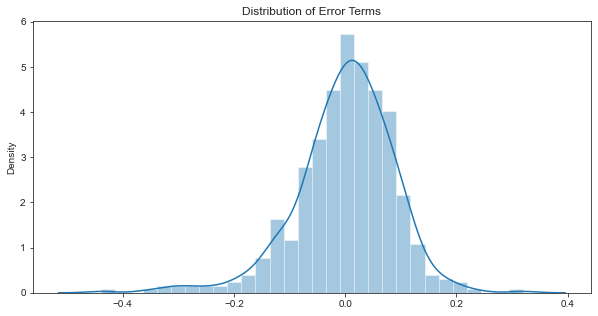

In [241]:
# Ploting of Residuals
plt.figure(figsize = (10,5))
sns.set_style("ticks")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

In [242]:
#Error terms are normally distributed to mean 0

In [257]:
#Check r2_score for data
r2_score(y_train,y_train_pred)

0.8449308962130678

In [246]:
#Now evaluate it on test set

In [261]:
#y_test = Bike_test.pop('cnt')
X_test = Bike_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,Aug,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,light snow,mist
184,1.0,0,1,1,0,0.831783,0.769660,0.657364,0.084219,0,...,0,0,0,0,0,0,0,0,0,1
535,1.0,1,0,3,1,0.901354,0.842587,0.610133,0.153728,0,...,0,0,0,0,0,0,1,0,0,0
299,1.0,0,0,4,1,0.511964,0.496145,0.837699,0.334206,0,...,0,0,0,1,0,0,0,1,0,1
221,1.0,0,0,3,1,0.881625,0.795343,0.437098,0.339570,1,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,4,1,0.817246,0.741471,0.314298,0.537414,0,...,0,0,0,0,0,0,1,0,0,0


In [271]:
X_test.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'spring', 'summer', 'winter', 'light snow',
       'mist'],
      dtype='object')

In [273]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [274]:
X_test_sm = X_test_sm.drop(['Mar','Jun','Aug','Oct','May','hum','atemp','workingday','Feb'],axis=1)

In [275]:
X_train_sm.columns
X_train_sm.shape

(510, 16)

In [277]:
y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.head(5)

184    0.367918
535    0.887395
299    0.432752
221    0.576254
152    0.561279
dtype: float64

In [278]:
r2_score(y_test, y_test_pred)

0.8187511659118026

In [279]:
#R2_Score on dataset shows 81.87%  on training dataset is 84.5 So we can say model is predicting well on unknown datset

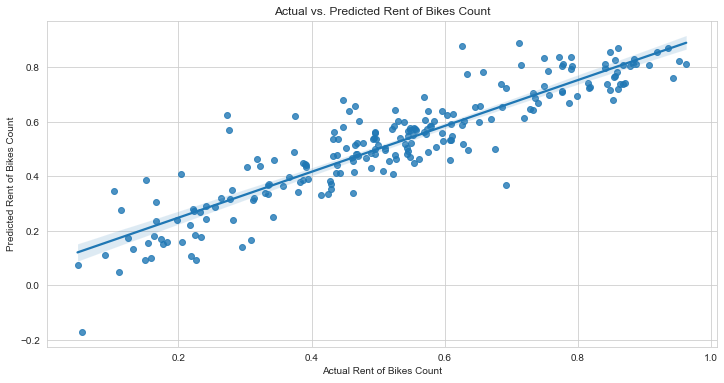

In [280]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

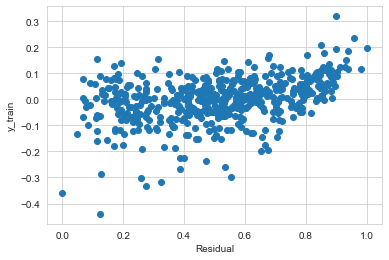

In [281]:
# scatter plot for the check residual patern
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [283]:
#Performing Recursive Feature Elimination RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [284]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 10),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 13),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light snow', True, 1),
 ('mist', True, 1)]

In [285]:
cols = X_train.columns[rfe.support_]

In [286]:
#Suppoerted columns
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Jul', 'Sep', 'spring',
       'summer', 'winter', 'light snow', 'mist'],
      dtype='object')

In [287]:
#Non supported Columns
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun',
       'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

In [288]:
X_train_lm = X_train[cols]

In [289]:
X_train_lm = sm.add_constant(X_train_lm)

In [290]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [291]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.95e-190
Time:                        22:02:43   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2848      0.034      8.258      0.000       0.217       0.353
yr             0.2294      0.008     28.208      0.000       0.213       0.245
holiday       -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp           0.5299      0.034     15.728      0.000       0.464       0.596
hum           -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed     -0.1822      0.026     -7.074      0.000      -0.233      -0.132
Jul           -0.0572      0.018     -3.123      0.002      -0.093      -0.021
Sep            0.0833      0.017      4.973      0.000       0.050       0.116
spring        -0.0564      0.021     -2.700      0.007      -0.097      -0.015
summer         0.0531      0.015      3.536      0.000       0.024       0.083
winter         0.0976      0.017      5.643      0.000       0.064       0.132
light snow    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
mist          -0.0527      0.010     -5.017      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [292]:
#RFE shows similar to our previous values.
#Not significant differencein r_square value.
#So we keep model as it is wuthout droping any variable.

In [296]:
#Check coefficent of each variable which impact on target variable
round(lr_model.params,2).sort_values(ascending=False)

temp          0.44
yr            0.24
const         0.22
winter        0.09
Sep           0.07
summer        0.04
weekday       0.01
Nov          -0.04
Dec          -0.05
Jan          -0.05
Jul          -0.05
spring       -0.07
holiday      -0.08
mist         -0.08
windspeed    -0.16
light snow   -0.29
dtype: float64

In [ ]:
#temp is micant feature unit increase in temp bile hire cnt increases by .44 percentry 
#similarly u.crease in yr bike hire increased by .24 percenit. i.e Demand is increased in each year
